In [44]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

# Lendo arquivo de dados do Titanic
df = pd.read_csv('titanic-data-6.csv')

# Testando se a importação ocorreu bem
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Limpeza de dados:

# Como vou utilizar a idade na minha análise, vou substituir os valores nulos pela média de idade total

# O mesmo irá acontecer com o Fare, vou retirar as tarifas gratuitas considerando que foi um erro de cadastramento / falta de dados

In [29]:
# Calculando a media de idade, e arredondano para baixo com floor
mediaIdade = math.floor(df['Age'].mean())

print('A média de idade é de %d anos' % mediaIdade)

A média de idade é de 29 anos


In [30]:
# Verificando Nan na coluna Age
dfIsNull = df.isnull().sum()

print('Há %d dados faltantes na coluna de idade.' % dfIsNull.Age)

Há 177 dados faltantes na coluna de idade.


In [31]:
# Substituindo as celulas de idade nulas
df['Age'] = df['Age'].fillna(mediaIdade)

dfIsNull = df.isnull().sum()

print('Agora há %d dados faltantes na coluna de idade.' % dfIsNull.Age)

Agora há 0 dados faltantes na coluna de idade.


In [32]:
# Calculando a media de Fare (taxas), e arredondano para baixo com floor
mediaFare = math.floor(df['Fare'].mean())

print('A média de Fare é de %d dólares (supondo que foi cobrado em dólar)' % mediaFare)

A média de Fare é de 32 dólares (supondo que foi cobrado em dólar)


In [33]:
# Verificando valores zerados na coluna Fare
dfIsZero = (df['Fare'] == 0).sum()

print('Há %d passagens com valor zerado' % dfIsZero)

Há 15 passagens com valor zerado


In [39]:
# Substituindo as celulas de Fare zeradas
df['Fare'] = df['Fare'].replace(0, mediaFare)

dfIsZero = (df['Fare'] == 0).sum()

print('Agora há %d dados zerados na coluna tarifas.' % dfIsZero)

Agora há 0 dados zerados na coluna tarifas.


# Agora que resolvemos os problemas nos dados, vamos para a análise!

# Vamos analisar os dados do Titanic com algumas perguntas

# 1 - Qual a quantidade de homens e mulheres no Titanic?

In [35]:
male = (df['Sex'] == 'male').sum()

female = (df['Sex'] == 'female').sum()

print("De acordo com estes dados o titanic tinha %d pessoas do sexo masculino e %d do sexo feminino." % (male, female))

De acordo com estes dados o titanic tinha 577 pessoas do sexo masculino e 314 do sexo feminino.


# Vemos que há mais homens que mulheres no navio.

# 2 - Qual a media de idade dos homens e das mulheres?

In [36]:
# Formando novos dataframes a partir do sexo
male_df = df.loc[df['Sex'] == 'male']
female_df = df.loc[df['Sex'] == 'female']

# Calulando as medias dos dois grupos
media_male = math.floor(male_df['Age'].sum() / male)
media_female = math.floor(female_df['Age'].sum() / female)

print("A média de idade dos homens no Titanic é de %d anos e das mulheres é de %d anos." % (media_male, media_female))

A média de idade dos homens no Titanic é de 30 anos e das mulheres é de 28 anos.


# As mulheres são mais novas que os homens!

# Vamos verificar agora a distribuição entre as classes socioeconomicas do Titanic

# 3 - Qual a classe que tem mais ingressantes?

In [37]:
firstClass  = df.loc[df['Pclass'] == 1]
secondClass = df.loc[df['Pclass'] == 2]
thirdClass  = df.loc[df['Pclass'] == 3]

print("A primeira classe tinha %d passageiros, a segunda %d e por fim a terceira %d" % (len(firstClass), len(secondClass), len(thirdClass)))

A primeira classe tinha 216 passageiros, a segunda 184 e por fim a terceira 491


# A classe mais ecônomica, foi a mais populada

# 4 - Qual é o preço do ticket mais caro e do mais barato?

In [40]:
highestFare = df['Fare'].max()
minimumFare = df['Fare'].min()

print('A tarifa mais cara foi de $%d e a mais barata de $%d dólares' % (highestFare, minimumFare))

A tarifa mais cara foi de $512 e a mais barata de $4 dólares


# Vamos analisar agora a questão de sobrevivência, quais foram os fatores que mais fizeram os tripulantes sobreviver

# 5 - Quais os fatores que mais fizeram as pessoas sobreviverem?

# 5.1 - Verificando pela classe:

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

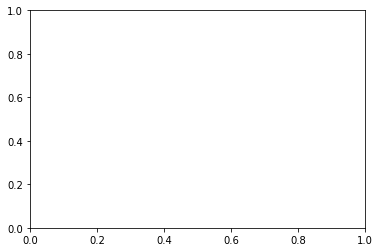

In [82]:

firstClassSurv = df.loc[(df['Pclass'] == 1) & df['Survived'] == 1]
secondClassSurv = df.loc[(df['Pclass'] == 2) & df['Survived'] == 1]
thirdClassSurv = df.loc[(df['Pclass'] == 3) & df['Survived'] == 1]

y = ['a', 'b', 'c']
x = [len(firstClassSurv), len(secondClassSurv), len(thirdClassSurv)]
labels = ['First Class', 'Second Class', 'Third Class']


survived = len(df.loc[df['Survived'] == 1])


plt.plot(x, survived)
plt.xticks(x, labels, rotation='vertical')